# LifeWatch publication - Geographical statistics 

This jupyter notebook contains geographical statistics relating to scientific publications published within the LifeWatch project.

In [1]:
# Load necessary libraries and functions
import sys
import os
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Select the data file
name_datafile = "test4.csv"

# Read data
location_standdata = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "LW_publications_standardized", name_datafile)
data = pd.read_csv(location_standdata)
data.rename(columns={'SortDate': 'Year'}, inplace=True)

In [6]:
data.columns

Index(['Unnamed: 0', 'BrefID', 'Year', 'BibLvlCode', 'StandardTitle',
       'RefStrFull', 'AbstractEnglish', 'Refstringauthors', 'WoScode',
       'FullAut', 'Affiliation', 'DOI', 'ownDOI', 'Special Collections',
       'GeoTerms', 'TaxTerms', 'ThesTerms', 'OtherTerms', 'AuthorKeywords',
       'wos_affil', 'wos_country', 'wos_keywords', 'wos_plus_keywords',
       'wos_categories', 'wos_researcharea', 'stand_affil',
       'similarity_method', 'stand_country', 'stand_flemish', 'stand_GROUP',
       'stand_QH'],
      dtype='object')

## Geographical statistics

### Number of Countries

In [41]:
#Number of unique countries
country_data = data[['BrefID','Year','stand_affil', 'stand_country']]
country_data.describe()

,BrefID,Year
count,300.000000,300.000000
mean,235001.230000,2013.433333
std,9569.908181,0.956699
min,213282.000000,2012.000000
25%,228189.000000,2013.000000
50%,238013.500000,2013.000000
75%,244260.500000,2014.000000
max,247339.000000,2016.000000


In [42]:
country_data.astype({'Year':'object'}).dtypes

BrefID            int64
Year             object
stand_affil      object
stand_country    object
dtype: object

In [43]:
#List of countries:
country_data['stand_country'].unique()

array([nan, 'Belgium', 'UK', 'Global', 'France', 'South Korea', 'USA',
       'Portugal', 'Canada', 'New Zealand', 'Russia', 'Argentina',
       'Germany', 'Brazil', 'Sweden', 'Ireland', 'Greece', 'Europe',
       'Norway', 'Netherlands', 'Israel', 'Italy', 'Australia', 'Poland',
       'South Africa', 'Spain', 'Luxembourg', 'Turkey', 'India',
       'Lithuania', 'Switzerland', 'Mexico', 'Cuba'], dtype=object)

In [44]:
#Cummulative number of countries 
countrydata_summ = country_data.groupby('Year', as_index=False).count()
countrydata_summ.T

,0,1,2,3,4
Year,2012,2013,2014,2015,2016
BrefID,59,92,110,38,1
stand_affil,40,60,89,32,1
stand_country,31,39,65,25,0


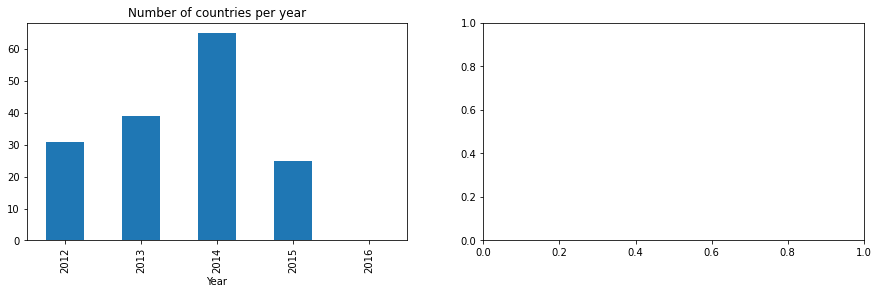

In [49]:
#Number of countries
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
pubs_barplot = countrydata_summ.plot(kind="bar", x='Year', y='stand_country', title="Number of countries per year", legend=False, ax=ax1)

Geographic map of countries?

In [54]:
#see code in python module - half implemented...

### Number of Flemish affiliations

In [50]:
#Number of Flemish affiliations:
flemish_data = data[['BrefID','Year','stand_affil', 'stand_country','stand_flemish']]
flemish_data.describe()

,BrefID,Year
count,300.000000,300.000000
mean,235001.230000,2013.433333
std,9569.908181,0.956699
min,213282.000000,2012.000000
25%,228189.000000,2013.000000
50%,238013.500000,2013.000000
75%,244260.500000,2014.000000
max,247339.000000,2016.000000


In [51]:
#Cummulative number of countries 
flemishdata_summ = flemish_data.groupby('Year', as_index=False).count()
flemishdata_summ.T

,0,1,2,3,4
Year,2012,2013,2014,2015,2016
BrefID,59,92,110,38,1
stand_affil,40,60,89,32,1
stand_country,31,39,65,25,0
stand_flemish,10,17,17,12,0


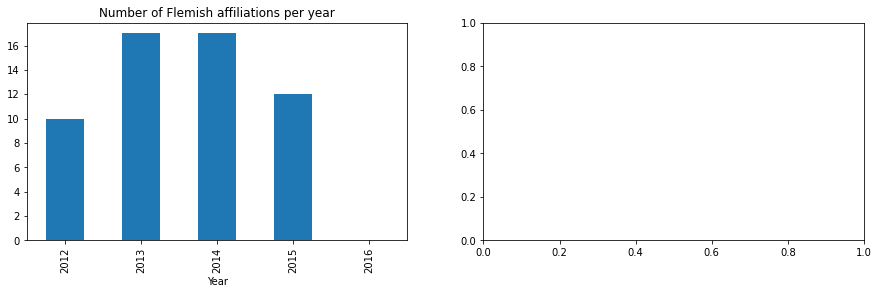

In [53]:
#Number of affiliations and number of Flemish affiliations 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
pubs_barplot = flemishdata_summ.plot(kind="bar", x='Year', y='stand_flemish', title="Number of Flemish affiliations per year", legend=False, ax=ax1)

In [40]:
#(As an example: The Flemish affiliations of year 2012:)
Flemish_2012 = country_data[ (country_data['Year'] == 2012) & (country_data['stand_flemish'] == 'x')]
Flemish_2012['stand_affil'].unique()

array(['VLIZ Flanders Marine Institute',
       'Ghent University - Faculty of Sciences - Biology Department - Research Group Marine Biology (MARBIOL)',
       'Ghent University - Faculty of Sciences - Biology Department - Protistology & Aquatic Ecology (PAE)'],
      dtype=object)

In [ ]:
#add horzontal bar plot with flemish/non-flemish


In [ ]:
#map (when time left)